In [1]:
#Creditos Joao Franco
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



In [2]:
filename = 'datatran2017b.csv'
df = pd.read_csv(filename)

In [3]:
df.describe()

,id,br,latitude,longitude,pessoas,mortos,feridos_leves,feridos_graves,feridos,ilesos,ignorados,veiculos
count,52250.000000,52169.000000,5.225000e+04,5.225000e+04,52250.000000,52250.000000,52250.000000,52250.000000,52250.000000,52250.000000,52250.0,52250.000000
mean,29804.175062,215.209492,-2.062280e+04,-7.874557e+04,2.299656,0.070048,0.732134,0.202105,0.934239,1.177895,1.0,1.627100
std,17114.181228,129.931553,4.522810e+06,1.757496e+07,1.823256,0.338862,1.085953,0.556339,1.248399,1.409805,0.0,0.751814
min,8.000000,10.000000,-1.033383e+09,-4.016764e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
25%,14951.250000,101.000000,-2.534235e+01,-5.036949e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
50%,30050.500000,163.000000,-2.045528e+01,-4.792999e+01,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0,2.000000
75%,44615.500000,343.000000,-1.310915e+01,-4.275335e+01,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,2.000000
max,69121.000000,495.000000,1.630000e+02,7.170000e+02,75.000000,21.000000,41.000000,21.000000,62.000000,64.000000,1.0,15.000000


In [4]:
df.shape

(52250, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52250 entries, 0 to 52249
Data columns (total 27 columns):
id                        52250 non-null int64
data_inversa              52250 non-null object
dia_semana                52250 non-null object
horario                   52250 non-null object
uf                        52250 non-null object
br                        52169 non-null float64
km                        52169 non-null object
municipio                 52250 non-null object
causa_acidente            52250 non-null object
tipo_acidente             52250 non-null object
classificacao_acidente    52250 non-null object
fase_dia                  52250 non-null object
sentido_via               52250 non-null object
condicao_metereologica    52250 non-null object
tipo_pista                52250 non-null object
tracado_via               52250 non-null object
uso_solo                  52250 non-null object
latitude                  52250 non-null float64
longitude                 

In [5]:
del_columns = [
    'id',
'data_inversa',
'km',
'sentido_via',
'tracado_via',
'uso_solo',
 'latitude',  
 'longitude'
  ]
for col in del_columns:
    del df[col]

In [6]:
df['municipio'].value_counts().head(12)

CURITIBA                742
BRASILIA                667
SAO JOSE - SC           496
GUARULHOS               487
PALHOCA                 427
SERRA                   370
BETIM                   354
DUQUE DE CAXIAS         344
SAO JOSE DOS PINHAIS    333
RECIFE                  308
UBERLANDIA              303
TERESINA                289
Name: municipio, dtype: int64

In [7]:
df.groupby('municipio').size().sort_values().tail(10).plot(title='Cidades com mais Acidentes',kind='barh', figsize=(8,5))

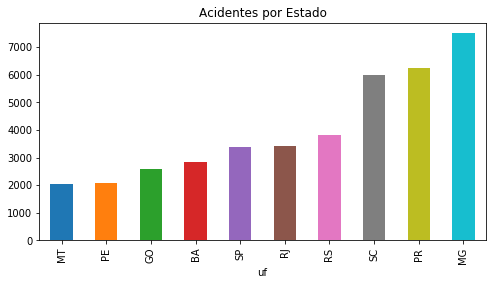

In [8]:
df.groupby('uf').size().sort_values().tail(10).plot(title='Acidentes por Estado',kind='bar', figsize=(8,4))

In [9]:
df.groupby('dia_semana').sum()

,br,pessoas,mortos,feridos_leves,feridos_graves,feridos,ilesos,ignorados,veiculos
dia_semana,,,,,,,,,
domingo,1840895.0,21006,815,6931,2145,9076,9787,8690,13519
quarta-feira,1370789.0,14240,383,4430,1137,5567,7611,6407,10684
quinta-feira,1516399.0,15723,463,4754,1188,5942,8574,6935,11532
sabado,1880133.0,20196,711,6583,1953,8536,9771,8664,13697
segunda-feira,1561774.0,16690,470,5371,1370,6741,8733,7294,11863
sexta-feira,1738312.0,18417,490,5665,1615,7280,9791,8035,13389
terca-feira,1318962.0,13885,328,4520,1152,5672,7278,6225,10332


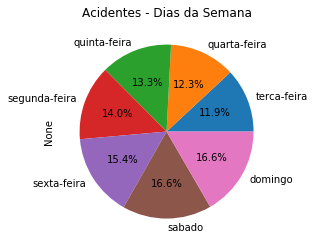

In [10]:
df.groupby('dia_semana').size().sort_values().plot(title='Acidentes - Dias da Semana',autopct='%1.1f%%', kind='pie')

In [11]:
df.groupby('classificacao_acidente').sum()

,br,pessoas,mortos,feridos_leves,feridos_graves,feridos,ilesos,ignorados,veiculos
classificacao_acidente,,,,,,,,,
Com Vitimas Fatais,668654.0,9810,3660,1625,1271,2896,2448,3002,5201
Com Vitimas Feridas,6652382.0,76181,0,36629,9289,45918,27007,31011,51211
Sem Vitimas,3906228.0,34166,0,0,0,0,32090,18237,28604


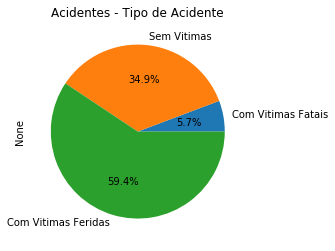

In [10]:
df.groupby('classificacao_acidente').size().sort_values().plot(title='Acidentes - Tipo de Acidente',autopct='%1.1f%%', kind='pie')

In [12]:
dados = pd.read_excel('acidentes.xlsx', sheet_name='pessoas')

In [13]:
print(dados)

       x  mortos  feridos_leves  feridos_graves  ilesos
0  valor    3660          57725           15935   79782


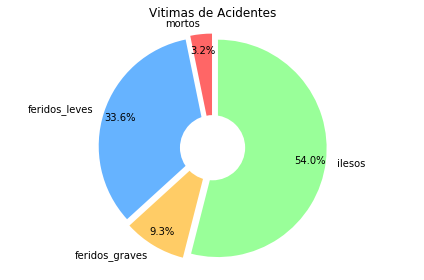

In [14]:
import matplotlib.pyplot as plt
labels = ['mortos','feridos_leves','feridos_graves','ilesos']

sizes = [3660, 38254,10560,61545]

colors = ['#ff6666','#66b3ff','#ffcc66','#99ff99']

explode = (0.05,0.05,0.05,0.05)

plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.30,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Vitimas de Acidentes')
plt.axis('equal')  
plt.tight_layout()
plt.show()

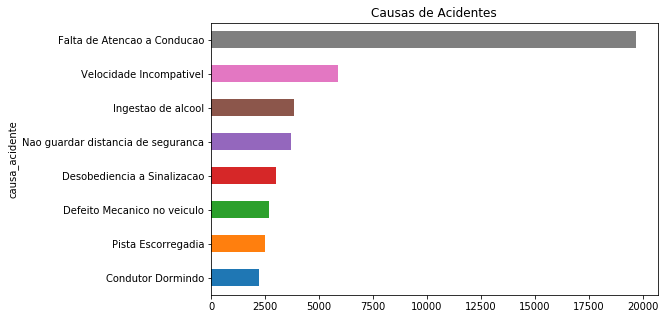

In [16]:
df.groupby('causa_acidente').size().sort_values().tail(8).plot(title='Causas de Acidentes',kind='barh', figsize=(8,5))

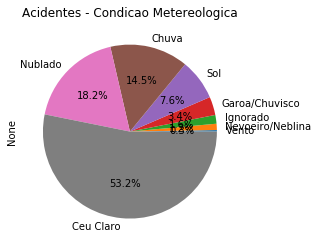

In [17]:
df.groupby('condicao_metereologica').size().sort_values().plot(title='Acidentes - Condicao Metereologica',autopct='%1.1f%%', kind='pie')

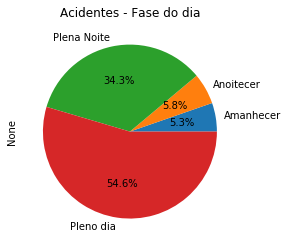

In [18]:
df.groupby('fase_dia').size().sort_values().plot(title='Acidentes - Fase do dia',autopct='%1.1f%%', kind='pie')

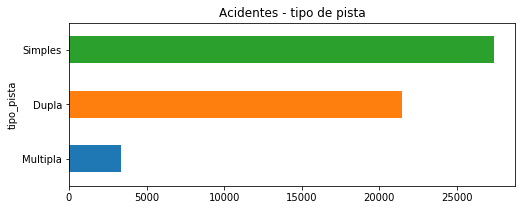

In [19]:
df.groupby('tipo_pista').size().sort_values().tail(10).plot(title='Acidentes - tipo de pista',kind='barh', figsize=(8,3))

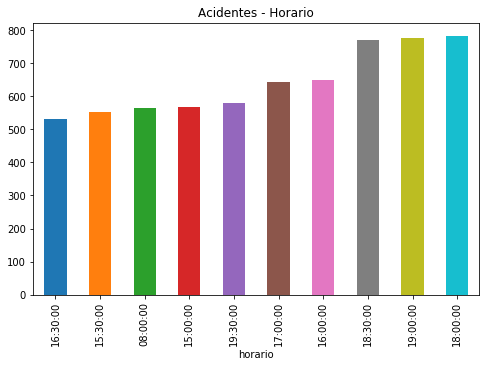

In [20]:
df.groupby('horario').size().sort_values().tail(10).plot(title='Acidentes - Horario',kind='bar', figsize=(8,5))

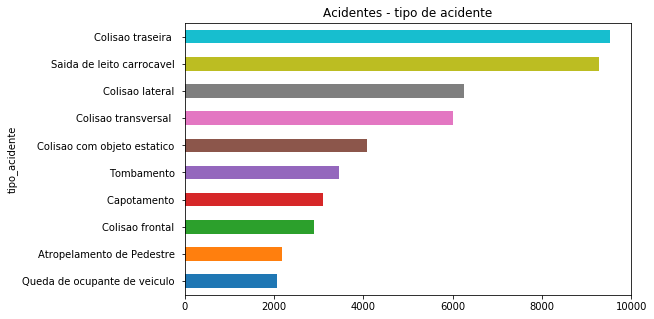

In [21]:
df.groupby('tipo_acidente').size().sort_values().tail(10).plot(title='Acidentes - tipo de acidente',kind='barh', figsize=(8,5))

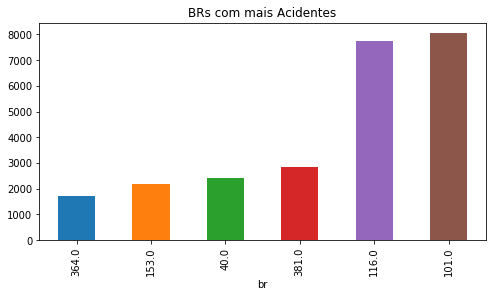

In [22]:
df.groupby('br').size().sort_values().tail(6).plot(title='BRs com mais Acidentes',kind='bar', figsize=(8,4))